# Imports

In [256]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Data collection

<b><i> Data import </i></b>

In [257]:
tit_data = pd.read_csv("Titanic dataset/train.csv")

In [258]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b><i> Columns description </i></b>

In [259]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |	
| Age |	Age in years |	
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |	
| ticket | Ticket number |	
| fare | Passenger fare	|
| cabin | Cabin number |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

# Data cleaning

<b><i> Describe the data </i></b>

In [260]:
tit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I notice that there is an outlier in the "Fare" feature. I wanna look into it.

In [261]:
tit_data[tit_data['Fare']==max(tit_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


I assume these 3 people are from the higher class of the ship.

<b><i> Check for null values </i></b>

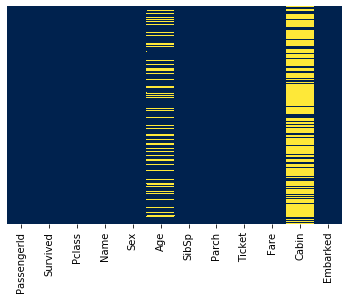

In [267]:
sns.heatmap(tit_data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [268]:
print("{0:.0%}".format(tit_data['Age'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Age' feature.")
print("{0:.0%}".format(tit_data['Cabin'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Cabin' feature.")

20% of missing values in the 'Age' feature.
77% of missing values in the 'Cabin' feature.


We can see that the "Cabin" feature has a lot of missing values, we might consider dropping it.
Regarding the "Age" feature, we might look into other solutions...

In [269]:
tit_data_clean = tit_data.drop('Cabin',axis=1)

In [270]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [271]:
tit_data_clean['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

I notice that "mean" and "median" are quite close. I assume both could be working solutions for filling missing values. I will choose "mean" to fill NAs.
Let's figure out if there is a smarter way to impute the "mean".

In [272]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


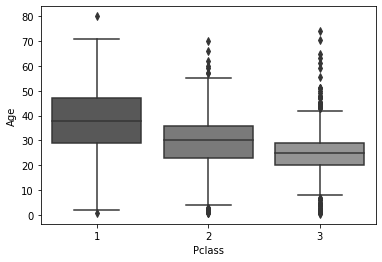

In [348]:
sns.boxplot(x='Pclass',y='Age',data=tit_data_clean,palette='cividis',saturation=0)

It seems like passengers who were in a higher class tended to be older. We could take the age mean of each class and input these accordingly to the missing values.

In [280]:
tit_data_clean[tit_data_clean['Pclass']==1]['Age'].mean()

38.233440860215055

In [281]:
tit_data_clean[tit_data_clean['Pclass']==2]['Age'].mean()

29.87763005780347

In [282]:
tit_data_clean[tit_data_clean['Pclass']==3]['Age'].mean()

25.14061971830986

In [283]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [284]:
tit_data_clean['Age'] = tit_data_clean[['Age','Pclass']].apply(impute_age,axis=1)

In [285]:
#tit_data_clean['Age'].fillna(tit_data['Age'].mean(),inplace=True)

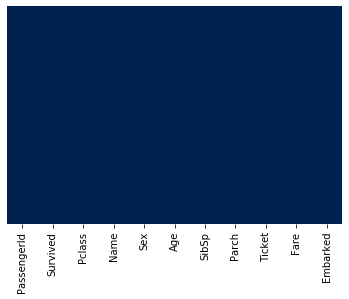

In [286]:
sns.heatmap(tit_data_clean.isnull(),yticklabels=False,cbar=False,cmap='cividis')

That's it! We took care of null values.

# Exploratory Data Analysis (EDA)

We might perform other steps of data cleaning during the EDA.

In [287]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


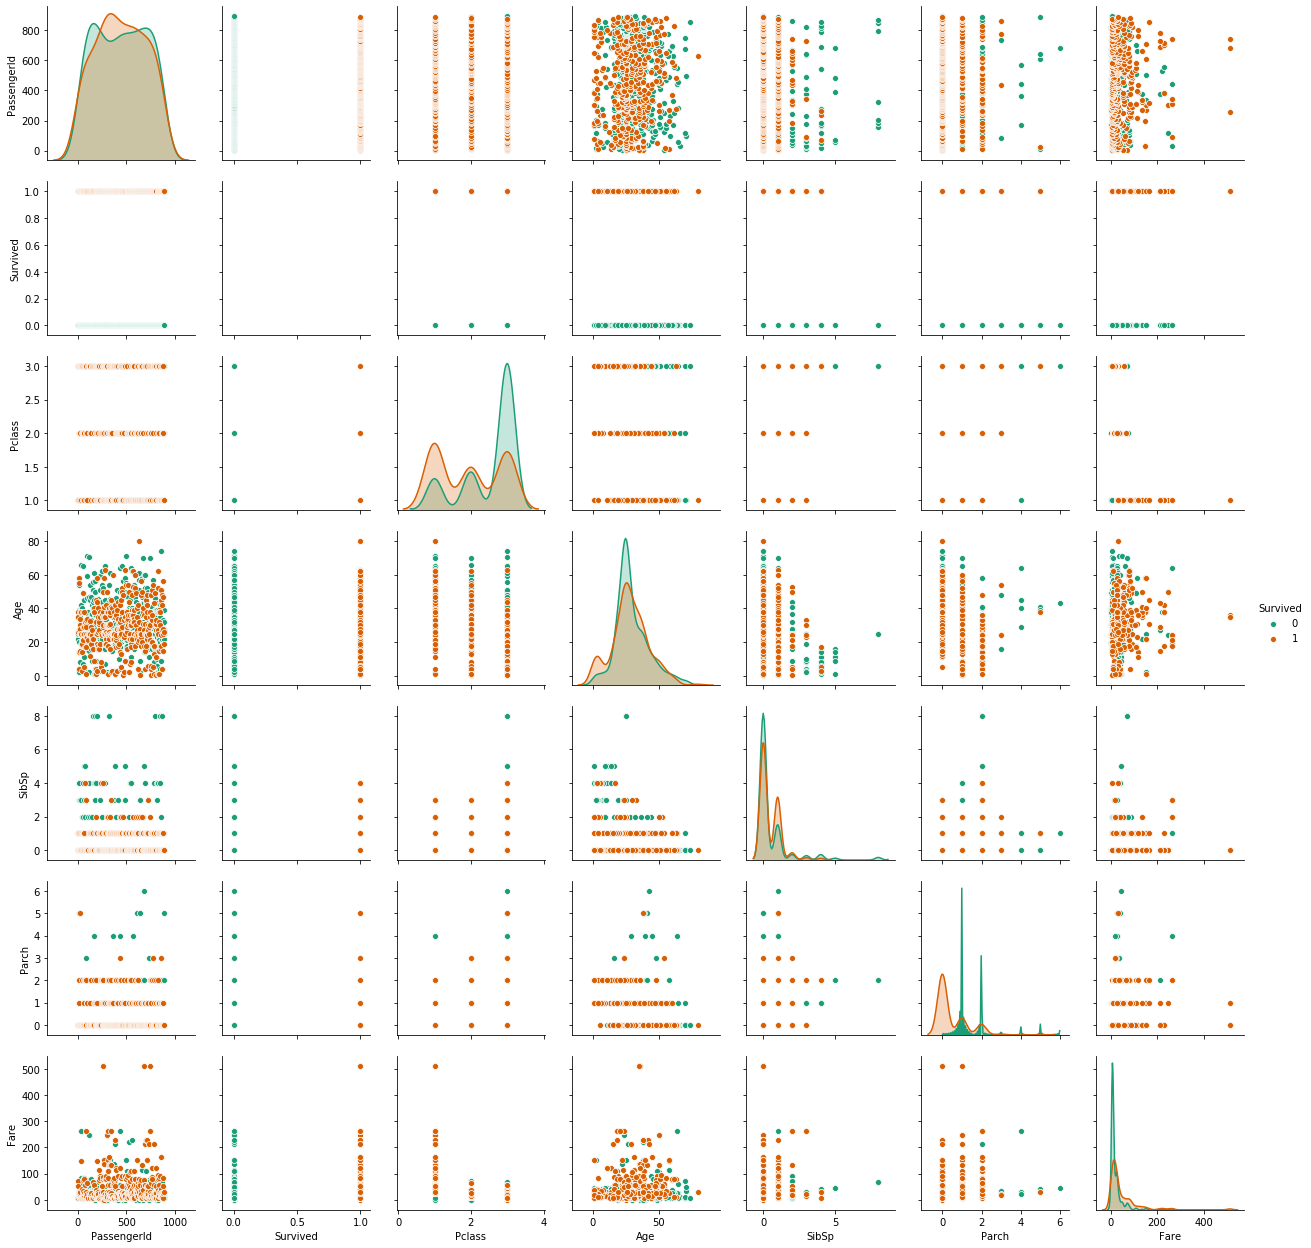

In [358]:
sns.pairplot(tit_data_clean,hue="Survived",plot_kws={'palette':'Dark2','alpha':1})

I will have a look in more details at some numerical features.

<b> NUMERICAL FEATURES </b>

<b><i> Age </i></b>

In [24]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


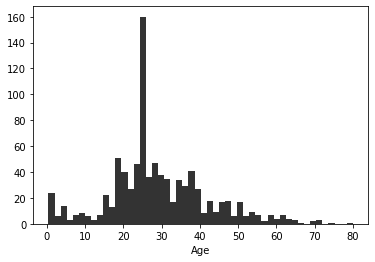

In [359]:
sns.distplot(tit_data_clean['Age'],kde=False,bins=50,hist_kws={'color':'black','alpha':0.8})

Having a look at this chart, I would like to know if the age had any impact on being a survivor or not. Therefore, I will transform these numerical values into categorical values in order to determine if any category was spared more than another.

In [361]:
tit_data_clean['Age_cat']=0
for i in range(0,tit_data_clean.shape[0]):
    if tit_data_clean['Age'][i]<=10:
        tit_data_clean['Age_cat'][i]='0-10'
    elif tit_data_clean['Age'][i]>10 and tit_data_clean['Age'][i]<=20:
        tit_data_clean['Age_cat'][i]='11-20'
    elif tit_data_clean['Age'][i]>20 and tit_data_clean['Age'][i]<=30:
        tit_data_clean['Age_cat'][i]='21-30'
    elif tit_data_clean['Age'][i]>30 and tit_data_clean['Age'][i]<=40:
        tit_data_clean['Age_cat'][i]='31-40'
    elif tit_data_clean['Age'][i]>40 and tit_data_clean['Age'][i]<=50:
        tit_data_clean['Age_cat'][i]='41-50'       
    elif tit_data_clean['Age'][i]>50 and tit_data_clean['Age'][i]<=60:
        tit_data_clean['Age_cat'][i]='51-60'
    elif tit_data_clean['Age'][i]>60 and tit_data_clean['Age'][i]<=70:
        tit_data_clean['Age_cat'][i]='61-70'
    elif tit_data_clean['Age'][i]>70 and tit_data_clean['Age'][i]<=80:
        tit_data_clean['Age_cat'][i]='71-80'

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CW

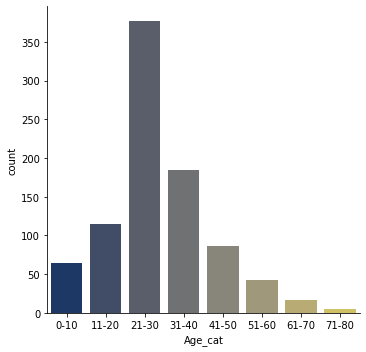

In [362]:
sns.catplot(x='Age_cat',data=tit_data_clean,kind='count',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'],palette='cividis')

Most passengers were aged between 21 and 30 y.o.

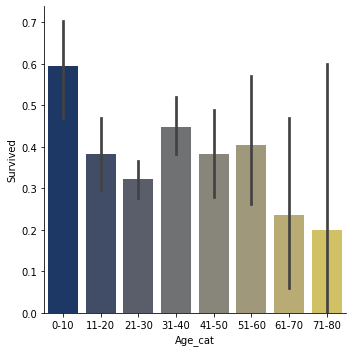

In [363]:
sns.catplot(x='Age_cat',y='Survived',data=tit_data_clean,kind='bar',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'],palette='cividis')

On average, it looks like babies and kids had more chance to survive.

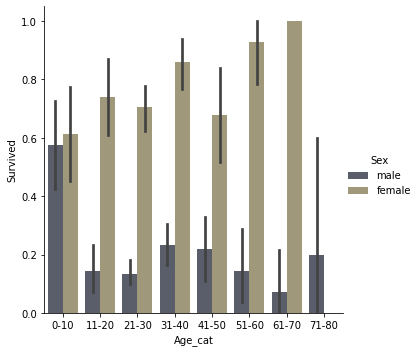

In [364]:
sns.catplot(x='Age_cat',y='Survived',data=tit_data_clean,kind='bar',hue='Sex',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'],palette='cividis')

On this chart we see that on average females between 61 and 70 y.o were more likely to survive than the other categories. For males, it is clear that young kids between 0 and 10 y.o were more likely to survive.

<b><i> SibSp + Parch </i></b>

In [365]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40


As 'SibSp' and 'Parch' are related, I will try to create a new feature called 'Family size'. I will then visualize this new feature and determine if larger/smaller families had more chance to survive.

In [366]:
tit_data_clean['Family Size'] = tit_data_clean['SibSp'] + tit_data_clean['Parch']

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


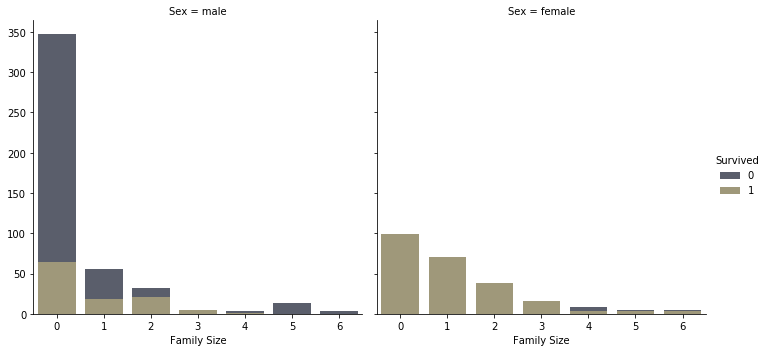

In [367]:
sns.FacetGrid(tit_data_clean,col='Sex',hue='Survived',height=5,palette='cividis').map(sns.countplot,'Family Size').add_legend()

These two graphs are very insightful:
- On the one hand, all females survived if they were either alone, or having a family between 1 and 3 people.
- On the other hand, males were less likely to survive if they were alone or having a family of 1 person (spouse?). Between 2 and 4 persons in the family, they had more chance to survive.

<b><i> Fare </i></b>

In [368]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


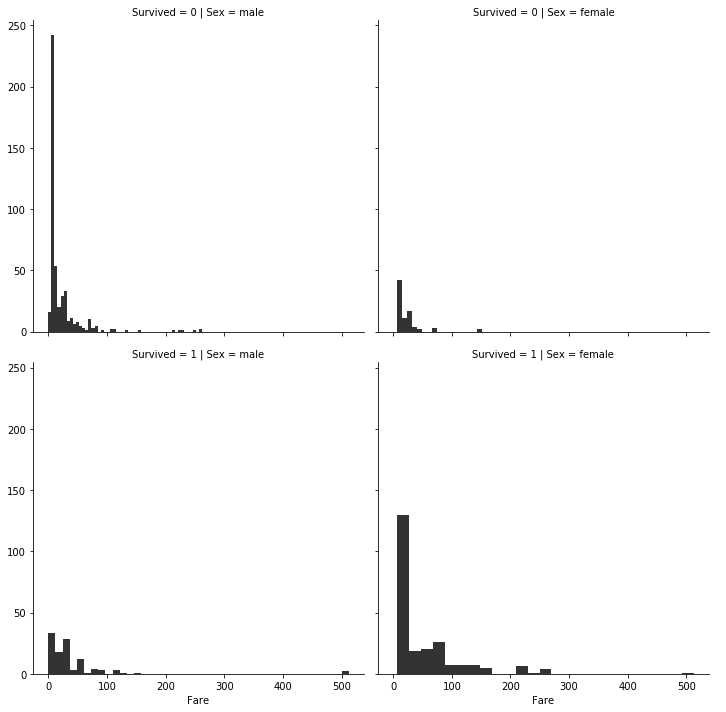

In [380]:
sns.FacetGrid(tit_data_clean,row='Survived',col='Sex',height=5).map(sns.distplot,'Fare',kde=False,hist_kws={'color':'black','alpha':0.8}).add_legend()

We notice here that the "Fare" data looks more spread if passengers survived.

In [381]:
print('Mean fare of men who survived:',tit_data_clean[(tit_data_clean['Survived']==1) & (tit_data_clean['Sex']=='male')]['Fare'].mean())
print('Mean fare of women who survived:',tit_data_clean[(tit_data_clean['Survived']==1) & (tit_data_clean['Sex']=='female')]['Fare'].mean())
print('Mean fare of men who did not survive:',tit_data_clean[(tit_data_clean['Survived']==0) & (tit_data_clean['Sex']=='male')]['Fare'].mean())
print('Mean fare of women who did not survive:',tit_data_clean[(tit_data_clean['Survived']==0) & (tit_data_clean['Sex']=='female')]['Fare'].mean())

Mean fare of men who survived: 40.82148440366974
Mean fare of women who survived: 51.93857339055791
Mean fare of men who did not survive: 21.960992948717944
Mean fare of women who did not survive: 23.02438518518519


Looking at the mean for each category, it is quite clear that men and women who survived had on average a higher fare than those who did not survive.

I will now look into categorical features.

<b> CATEGORICAL FEATURES </b>

<b><i> Sex </i></b>

In [382]:
print("{0:.0%}".format(tit_data_clean['Sex'].value_counts()[0]/tit_data.shape[0]),"of passengers are male.")
print("{0:.0%}".format(tit_data_clean['Sex'].value_counts()[1]/tit_data.shape[0]),"of passengers are female.")

65% of passengers are male.
35% of passengers are female.


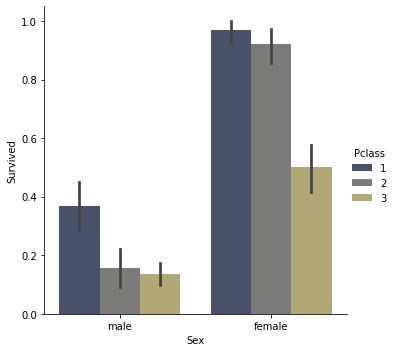

In [383]:
sns.catplot(x='Sex',y='Survived',data=tit_data_clean,kind='bar',hue="Pclass",palette='cividis')

There are two main insights here:
- Males are on average less likely to survive than females
- Third classes are less likely to survive than the others (huge gap between second and third class in female category)
<p>&nbsp;</p>
<i> Even women from third class were more likely to survive than men from first class. </i>

We can imagine that "Sex" and "Pclass" will be important features for our model.

<b><i> Embarked </i></b>

In [384]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


In [385]:
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[0]/tit_data.shape[0]),"of passengers embarked from Southampton (S).") 
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[1]/tit_data.shape[0]),"of passengers embarked from Cherbourg (C).") 
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[2]/tit_data.shape[0]),"of passengers embarked from Queenstown (Q).") 

72% of passengers embarked from Southampton (S).
19% of passengers embarked from Cherbourg (C).
9% of passengers embarked from Queenstown (Q).


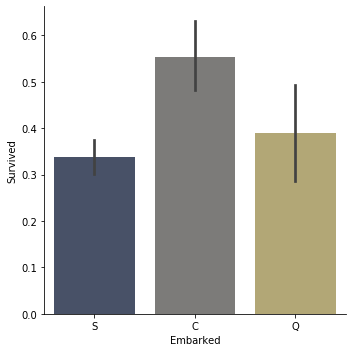

In [386]:
sns.catplot(x='Embarked',y='Survived',data=tit_data_clean,kind='bar',palette='cividis')

Here is another insightful graph. It looks like passengers who embarked from Cherbourg were most likely to survive (on average).

<b> CORRELATIONS </b>

In [387]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


In [388]:
tit_data_clean.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
PassengerId,1.000000,-0.005007,-0.035144,0.035318,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.050156,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.404262,0.083081,0.018443,-0.549500,0.065997
Age,0.035318,-0.050156,-0.404262,1.000000,-0.243549,-0.175264,0.121044,-0.254016
SibSp,-0.057527,-0.035322,0.083081,-0.243549,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.175264,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.121044,0.159651,0.216225,1.000000,0.217138
Family Size,-0.040143,0.016639,0.065997,-0.254016,0.890712,0.783111,0.217138,1.000000


Let's create a heatmap to visualize the data better.

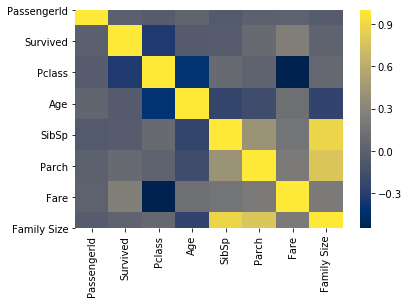

In [389]:
sns.heatmap(tit_data_clean.corr(),cmap='cividis')

Here we can clearly see that: 
- 'Pclass' is negatively correlated to 'Survived' (-0.34)
- 'Fare' is positively correlated to 'Survived' (0.26)

These two features should be decisive in model building.

<b> ADDITIONAL DATA CLEANING </b>

In [390]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


Here are the aditional data cleaning steps I wanna perform:
- Remove 'PassengerId' which I don't think will be of any use
- Remove 'Name' even if I believe it would be interesting to perform some NLP here (let's put this as potential model improvement/exploration)
- Perform one-hot encoding for 'Sex' as models need to be fed with numerical features
- Remove 'SibSp' and 'Parch' as these two features are now counted in 'Family Size'
- Remove 'Ticket' even if we could maybe do something with that feature (let's keep that is mind for future improvements)
- Perform one-hot encoding for 'Embarked'
- Remove 'Age_cat' as its only purpose was for the EDA

<b><i> Dropping features </i></b>

In [391]:
tit_data_model = tit_data_clean.drop(['PassengerId','Name','SibSp','Parch','Ticket','Age_cat'],axis=1)

In [392]:
tit_data_model.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


<b><i> One-Hot encoding </i></b>

In [393]:
tit_data_model = tit_data_model.join(pd.get_dummies(tit_data_model['Sex'],drop_first=True)).drop('Sex',axis=1)

In [394]:
tit_data_model = tit_data_model.join(pd.get_dummies(tit_data_model['Embarked'],drop_first=True)).drop('Embarked',axis=1)

In [395]:
tit_data_model.head()

,Survived,Pclass,Age,Fare,Family Size,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


# Model building

To start with model building, I will perform a simple multiple linear regression as a baseline.
I won't need to create a test set as it is already created by Kaggle.

<b> KAGGLE TEST SET </b>

In [299]:
X_test_k = pd.read_csv('Titanic dataset/test.csv')

I need to perform the exact same steps I already performed for the training set.

In [300]:
X_test_k = X_test_k.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [301]:
X_test_k.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [302]:
#X_test_k['Age'].fillna(X_test['Age'].mean(),inplace=True)

X_test_k['Age'] = X_test_k[['Age','Pclass']].apply(impute_age,axis=1)

In [303]:
X_test_k['Family Size'] = X_test_k['SibSp'] + X_test_k['Parch']
X_test_k = X_test_k.drop(['SibSp','Parch'],axis=1)

In [304]:
X_test_k = X_test_k.join(pd.get_dummies(X_test_k['Sex'],drop_first=True)).drop('Sex',axis=1)

In [305]:
X_test_k = X_test_k.join(pd.get_dummies(X_test_k['Embarked'],drop_first=True)).drop('Embarked',axis=1)

In [306]:
X_test_k.head()

,Pclass,Age,Fare,Family Size,male,Q,S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1
2,2,62.0,9.6875,0,1,1,0
3,3,27.0,8.6625,0,1,0,1
4,3,22.0,12.2875,2,0,0,1


While working on the model, I noticed there was a null value in 'Fare'. I will take the mean to fill it (only one null value).

In [307]:
X_test_k['Fare'].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [308]:
X_test_k['Fare'].fillna(X_test_k['Fare'].mean(),inplace=True)

X_test is now ready!

For each model, we will create a train-test split on the training data. Then we will send our final predictions using the test set from Kaggle.
Using this methodology, it allows us to have a proper train + cross-validation + test set.

<b> MULTIPLE LINEAR REGRESSION </b>

<b><i> Train-test split </i></b>

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
tit_data_model.head()

,Survived,Pclass,Age,Fare,Family Size,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [77]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Model </i></b>

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()

In [81]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
predictions = lm.predict(X_test)

In [97]:
def final_pred(x):
    if x>=0.5:
        return 1
    else:
        return 0

In [98]:
df_predictions = pd.DataFrame()
df_predictions['Survived'] = predictions
df_predictions['Survived'] = df_predictions['Survived'].apply(final_pred)

<b><i> Checking model performance </i></b>

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
print(confusion_matrix(y_test,df_predictions))

[[134  23]
 [ 32  79]]


In [101]:
print(classification_report(y_test,df_predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



On our cross-validation set, it looks like the model has an accuracy of 0.79 which is quite great for a first go.

<b><i> Final submission </i></b>

In [105]:
predictions_k = lm.predict(X_test_k)

In [108]:
df_predictions_k = pd.DataFrame()
df_predictions_k['Survived'] = predictions_k
df_predictions_k['Survived'] = df_predictions_k['Survived'].apply(final_pred)

In [109]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=df_predictions_k

In [111]:
submission.to_csv('Submissions/LinearRegression.csv',index=False)

I submitted the predictions on Kaggle and I got an accuracy score of <b>0.75598</b>.
Let's try to improve the accuracy with a Logistic Regression model.

<b> LOGISTIC REGRESSION </b>

<b><i> Train-test split </i></b>

In [115]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Model </i></b>

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression()

In [119]:
lr.fit(X_train,y_train)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
predictions = lr.predict(X_test)

<b><i> Checking model performance </i></b>

In [123]:
print(confusion_matrix(y_test,predictions))

[[138  19]
 [ 33  78]]


In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



Logistic Regression performed better with an accuracy of 0.81.

<b><i> Final submission </i></b>

In [129]:
predictions_k = lr.predict(X_test_k)

In [130]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [131]:
submission.to_csv('Submissions/LogisticRegression.csv',index=False)

I submitted the predictions on Kaggle and I got an accuracy score of <b>0.76555</b> which is an improvement.
Let's try to improve the accuracy with a Decision Tree model.

<b> LOGISTIC REGRESSION with feature scaling and normalization </b>

<b><i> Train-test split </i></b>

In [172]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Feature scaling and normalization </i></b>

In [174]:
from sklearn import preprocessing

In [175]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [176]:
X_train = scaler.transform(X_train)

In [177]:
X_test = scaler.transform(X_test)

<b><i> Model </i></b>

In [178]:
lr = LogisticRegression()

In [179]:
lr.fit(X_train,y_train)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
predictions = lr.predict(X_test)

<b><i> Checking model performance </i></b>

In [181]:
print(confusion_matrix(y_test,predictions))

[[137  20]
 [ 30  81]]


In [182]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



It has the same accuracy than the Logistic Regression with feature scaling, but it performed better if we look at the f1-score.

<b><i> Final submission </i></b>

In [183]:
X_test_k = scaler.transform(X_test_k)

In [184]:
predictions_k = lr.predict(X_test_k)

In [185]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [186]:
submission.to_csv('Submissions/LogisticRegression_scaled.csv',index=False)

I got an accuracy score of <b>0.77033</b> on Kaggle which is the best score so far.

<b> DECISION TREE </b>

<b><i> Train-test split </i></b>

In [258]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Model </i></b>

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
dt = DecisionTreeClassifier()

In [266]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [267]:
predictions = dt.predict(X_test)

<b><i> Checking model performance </i></b>

In [268]:
print(confusion_matrix(y_test,predictions))

[[131  26]
 [ 29  82]]


In [269]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



It looks like the Decision Tree model performed worse (0.79) than the Logistic Regression model.

<b><i> Final submission </i></b>

In [142]:
predictions_k = dt.predict(X_test_k)

In [143]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [145]:
submission.to_csv('Submissions/DecisionTree.csv',index=False)

I submitted the predictions on Kaggle and I got an accuracy score of <b>0.73684</b> which is not an improvement.
Let's try to improve the accuracy with a Random Forest model.

<b> RANDOM FOREST </b>

<b><i> Train-test split </i></b>

In [146]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Model </i></b>

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc = RandomForestClassifier(n_estimators=600)

In [150]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
predictions = rfc.predict(X_test)

<b><i> Checking model performance </i></b>

In [152]:
print(confusion_matrix(y_test,predictions))

[[130  27]
 [ 31  80]]


In [153]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



With an accuracy of 0.78, it is the model which performed the worst.

<b><i> Final submission </i></b>

In [154]:
predictions_k = rfc.predict(X_test_k)

In [155]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [156]:
submission.to_csv('Submissions/RandomForest.csv',index=False)

I submitted the predictions on Kaggle and I got an accuracy score of <b>0.75598</b> which is not an improvement.
It seems like the best model was the Logistic Regression. Let's see if there are ways to improve it further.

<b> GRADIENT BOOSTING </b>

<b><i> Train-test split </i></b>

In [232]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b><i> Model </i></b>

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
gb = GradientBoostingClassifier()

In [236]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [237]:
predictions = gb.predict(X_test)

<b><i> Checking model performance </i></b>

In [238]:
print(confusion_matrix(y_test,predictions))

[[144  13]
 [ 37  74]]


In [239]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



Looking at precision and recall, it looks like the model performed slightly better than Logistic Regression.

<b><i> Final submission </i></b>

In [195]:
predictions_k = gb.predict(X_test_k)

In [196]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [197]:
submission.to_csv('Submissions/GradientBoosting.csv',index=False)

On Kaggle, it performed really well. I got an accuracy score of <b>0.78947</b>. It is the best model by far!

<b><i> GRADIENT BOOSTING using GridSearchCV </i></b>

As the Gradient Boosting model performed best, I will try to optimize it using GridSearchCV.

<b><i> Train-test split </i></b>

In [279]:
X = tit_data_model.drop('Survived',axis=1)
y = tit_data_model['Survived']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b> Model </b>

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
param_grid = {'loss':['deviance','exponential'],'learning_rate': [0.001,0.01,0.1,1, 10],'n_estimators': [10,100,500,1000],'max_depth':[3,10,50,100]} 

In [283]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)

In [284]:
grid.fit(X_train,y_train)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=10, score=0.628, total=   0.0s
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100, score=0.630, total=   0.1s
[CV] learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  learn

[CV]  learning_rate=0.001, loss=deviance, max_depth=100, n_estimators=1000, score=0.797, total=   2.8s
[CV] learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=10, score=0.628, total=   0.0s
[CV] learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100 
[CV]  learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, score=0.630, total=   0.0s
[CV] learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100 
[CV]  learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, score=0.630, total=   0.0s
[CV] learning

[CV]  learning_rate=0.001, loss=exponential, max_depth=100, n_estimators=1000, score=0.750, total=   2.6s
[CV] learning_rate=0.001, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.001, loss=exponential, max_depth=100, n_estimators=1000, score=0.764, total=   2.7s
[CV] learning_rate=0.001, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.001, loss=exponential, max_depth=100, n_estimators=1000, score=0.802, total=   3.1s
[CV] learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10 .
[CV]  learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10 .
[CV]  learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10 .
[CV]  learning_rate=0.01, loss=deviance, max_depth=3, n_estimators=10, score=0.628, total=   0.0s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=deviance, max_depth=100, n_estimators=1000, score=0.755, total=   2.2s
[CV] learning_rate=0.01, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.01, loss=deviance, max_depth=100, n_estimators=1000, score=0.764, total=   2.5s
[CV] learning_rate=0.01, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.01, loss=deviance, max_depth=100, n_estimators=1000, score=0.802, total=   2.6s
[CV] learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10, score=0.630, total=   0.0s
[CV] learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=10, score=0.628, total=   0.0s
[CV] learning_rate=0.01,

[CV]  learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=500, score=0.807, total=   1.6s
[CV] learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000, score=0.760, total=   2.5s
[CV] learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000, score=0.764, total=   2.6s
[CV] learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.01, loss=exponential, max_depth=100, n_estimators=1000, score=0.802, total=   3.3s
[CV] learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=10 ..
[CV]  learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=10, score=0.827, total=   0.0s
[CV] learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=10 ..
[CV]  learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=10, score=0.822, total=   0.0s
[CV] learning_

[CV]  learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=500, score=0.792, total=   1.4s
[CV] learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000, score=0.784, total=   2.0s
[CV] learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000, score=0.784, total=   1.7s
[CV] learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=deviance, max_depth=100, n_estimators=1000, score=0.797, total=   2.9s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=10, score=0.827, total=   0.0s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=10, score=0.808, total=   0.0s
[CV] learning_rate=0.1, loss=expon

[CV]  learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=500, score=0.764, total=   1.0s
[CV] learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=500 
[CV]  learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=500, score=0.778, total=   1.6s
[CV] learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000, score=0.788, total=   2.1s
[CV] learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000, score=0.760, total=   1.9s
[CV] learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=0.1, loss=exponential, max_depth=100, n_estimators=1000, score=0.773, total=   3.0s
[CV] learning_rate=1, loss=deviance, max_depth=3, n_estimators=10 ....
[CV]  learning_rate=1, loss=deviance, max_depth=3, n_estimators=10, score=0.827, total=   0.0s
[CV] learning

[CV]  learning_rate=1, loss=deviance, max_depth=100, n_estimators=500, score=0.758, total=   1.3s
[CV] learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000, score=0.793, total=   2.3s
[CV] learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000, score=0.769, total=   1.4s
[CV] learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=deviance, max_depth=100, n_estimators=1000, score=0.768, total=   2.5s
[CV] learning_rate=1, loss=exponential, max_depth=3, n_estimators=10 .
[CV]  learning_rate=1, loss=exponential, max_depth=3, n_estimators=10, score=0.808, total=   0.0s
[CV] learning_rate=1, loss=exponential, max_depth=3, n_estimators=10 .
[CV]  learning_rate=1, loss=exponential, max_depth=3, n_estimators=10, score=0.784, total=   0.0s
[CV] learning_rate=1, loss=exponential, max_depth=3, n

[CV]  learning_rate=1, loss=exponential, max_depth=100, n_estimators=500, score=0.710, total=   1.9s
[CV] learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000, score=0.702, total=   3.4s
[CV] learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000, score=0.736, total=   3.1s
[CV] learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=1, loss=exponential, max_depth=100, n_estimators=1000, score=0.725, total=   3.8s
[CV] learning_rate=10, loss=deviance, max_depth=3, n_estimators=10 ...
[CV]  learning_rate=10, loss=deviance, max_depth=3, n_estimators=10, score=0.832, total=   0.0s
[CV] learning_rate=10, loss=deviance, max_depth=3, n_estimators=10 ...
[CV]  learning_rate=10, loss=deviance, max_depth=3, n_estimators=10, score=0.255, total=   0.0s
[CV] learning_rate=10, loss=deviance,

[CV]  learning_rate=10, loss=deviance, max_depth=100, n_estimators=1000, score=0.760, total=   0.9s
[CV] learning_rate=10, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=10, loss=deviance, max_depth=100, n_estimators=1000, score=0.764, total=   0.6s
[CV] learning_rate=10, loss=deviance, max_depth=100, n_estimators=1000 
[CV]  learning_rate=10, loss=deviance, max_depth=100, n_estimators=1000, score=0.773, total=   1.0s
[CV] learning_rate=10, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=10, loss=exponential, max_depth=3, n_estimators=10, score=0.312, total=   0.0s
[CV] learning_rate=10, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=10, loss=exponential, max_depth=3, n_estimators=10, score=0.731, total=   0.0s
[CV] learning_rate=10, loss=exponential, max_depth=3, n_estimators=10 
[CV]  learning_rate=10, loss=exponential, max_depth=3, n_estimators=10, score=0.266, total=   0.0s
[CV] learning_rate=10, loss=exponential, max_d

[CV]  learning_rate=10, loss=exponential, max_depth=100, n_estimators=1000, score=0.721, total=   1.0s
[CV] learning_rate=10, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=10, loss=exponential, max_depth=100, n_estimators=1000, score=0.707, total=   0.7s
[CV] learning_rate=10, loss=exponential, max_depth=100, n_estimators=1000 
[CV]  learning_rate=10, loss=exponential, max_depth=100, n_estimators=1000, score=0.715, total=   1.4s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  presort='auto',
  

In [285]:
grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [286]:
predictions = grid.predict(X_test)

<b><i> Checking model performance </i></b>

In [287]:
print(confusion_matrix(y_test,predictions))

[[144  13]
 [ 37  74]]


In [292]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



<b><i> Submission file </i></b>

In [309]:
predictions_k = grid.predict(X_test_k)

In [311]:
submission = pd.DataFrame()
passengerid = pd.read_csv('Titanic dataset/test.csv')
submission['PassengerId'] = passengerid['PassengerId']
submission['Survived']=predictions_k

In [312]:
submission.to_csv('Submissions/GradientBoosting_grid.csv',index=False)

It did not perform as well as the previous Gradient Boosting. It might be because the GridSearchCV overfitted the training set. The accuracy is <b>0.77511</b>.